# Hilbert transform of frequency comb

In [6]:
import src.paths

In [7]:
DATE = '2022-09-16'
CHANNEL = 160

In [8]:
%%time
spikes = pd.read_pickle(src.paths.DATA / DATE / f'{DATE}-hpc-spikes.pkl')
csd = pd.read_pickle(src.paths.DATA / DATE / f'{DATE}-hpc-csd.pkl')

KeyboardInterrupt: 

In [9]:
spikes = spikes.loc[0:7200 - 1 / 250, CHANNEL - 4:CHANNEL + 3]
csd = csd.loc[0:7200 - 1 / 1250, CHANNEL / 4]
csd = csd * 0.001

NameError: name 'csd' is not defined

In [ ]:
from scipy.signal import iirnotch, filtfilt

COMB_MIN = 1
COMB_MAX = 100
COMB_Q = 8

def frequency_comb(x, freqs, Q):
    l = []
    for w0 in tqdm.tqdm(freqs):
        y = x - filtfilt(*iirnotch(w0, Q, fs=1250), x)
        l.append(y)
    return np.array(l).T

In [ ]:
freqs = range(COMB_MIN, COMB_MAX + 1)
comb = frequency_comb(csd.values, freqs, COMB_Q)
comb = pd.DataFrame(comb, index=csd.index, columns=freqs)

In [ ]:
%%time
hilbert = scipy.signal.hilbert(comb.values, axis=0)
hilbert = pd.DataFrame(hilbert, index=comb.index, columns=comb.columns)

In [ ]:
start = 645
end = 655
freqs = range(2, 16)

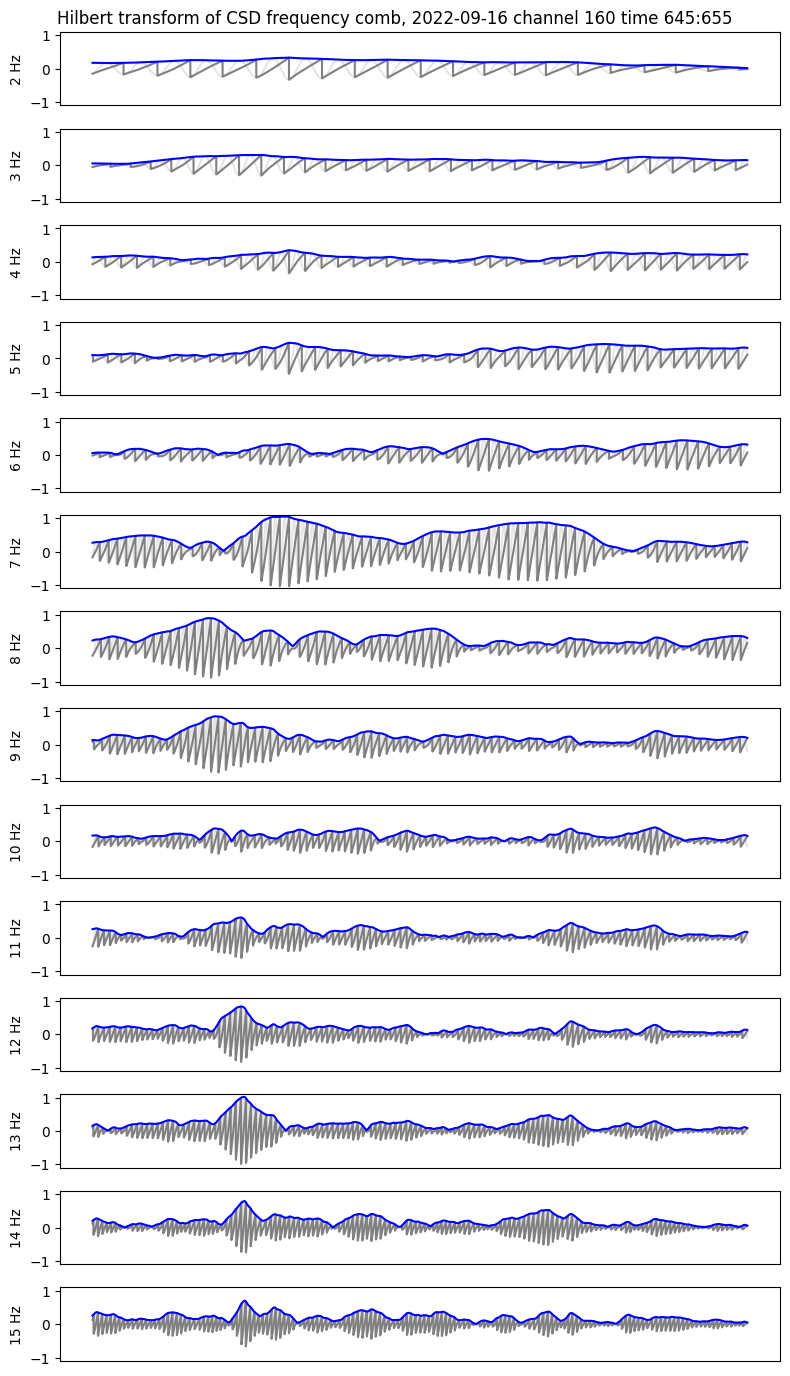

In [98]:
fig, ax = plt.subplots(14, 1, figsize=(8, 14))
plt.suptitle(f'Hilbert transform of CSD frequency comb, {DATE} channel {CHANNEL} time {start}:{end}')

for i, freq in enumerate(freqs):
    x = hilbert.loc[start:end, freq]
    amp = np.abs(x)
    phi = np.angle(x)
    plt.sca(ax[i])
    plt.plot(x.index, x, color='k', alpha=0.1)
    plt.plot(x.index, amp * phi / np.pi, color='gray')
    plt.plot(x.index, amp, color='b')
    plt.xticks([])
    plt.ylim([-1.1, 1.1])
    plt.ylabel(f'{freq} Hz')

plt.tight_layout()
plt.savefig(f'{DATE}-hpc-csd-freq-comb-hilbert-channel-{CHANNEL}-time-{start}-{end}.png', dpi=200)
plt.show()

In [2]:
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(min(freq), max(freq))
colors = {w0: cmap(norm(w0)) for w0 in freqs}

NameError: name 'freq' is not defined

In [3]:
x = hilbert.loc[start:end, freqs]

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
amp = np.abs(x)
phi = np.angle(x)

plt.sca(ax[0])
plt.gca().matshow(amp.T)
plt.axis('auto')

plt.tight_layout()
plt.show()

NameError: name 'hilbert' is not defined

In [62]:
colors

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.283091, 0.110553, 0.431554, 1.      ],
       [0.271828, 0.209303, 0.504434, 1.      ],
       [0.239346, 0.300855, 0.540844, 1.      ],
       [0.203063, 0.379716, 0.553925, 1.      ],
       [0.169646, 0.456262, 0.55803 , 1.      ],
       [0.140536, 0.530132, 0.555659, 1.      ],
       [0.120092, 0.600104, 0.54253 , 1.      ],
       [0.146616, 0.67305 , 0.508936, 1.      ],
       [0.252899, 0.742211, 0.448284, 1.      ],
       [0.404001, 0.800275, 0.362552, 1.      ],
       [0.595839, 0.848717, 0.243329, 1.      ],
       [0.804182, 0.882046, 0.114965, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])